# MNIST Neural Network

In [55]:
# ! pip install numpy 

In [56]:
#import sklearn
#sklearn.__version__

'0.23.2'

### Import the necessary libraries

In [57]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

### Fetch the MNIST dataset

In [58]:
# WONT WORK WITH OLDER VERSIONS OF SCIKIT-LEARN
# from sklearn.datasets import fetch_mldata
# mnist = fetch_mldata('MNIST original')

In [59]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True) # get MNIST dataset, save features to X and labels to y

### Normalization of data

In [60]:
X # X dataset

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [61]:
# here we want to make the pixel intensity range [0,1]
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [62]:
X # X dataset after normalized 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Preparing the dataset

In [63]:
# resize y from 70000, 0 to 10, 70000
# This way instead of the label being a number (ie, 5), we have a 2D array where the rowss are possible labels (ie 1 - 10)
# and the columns are the images, we are essentially encoding the labels

digits = 10
examples = y.shape[0]

y = y.reshape(1, examples)

Y_new = np.eye(digits)[y.astype('int32')] # this is just preprocessing, try splitting each line independently 
Y_new = Y_new.T.reshape(digits, examples) # preparing canvas

In [64]:
Y_new, Y_new.shape 

(array([[0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 (10, 70000))

In [65]:
# split X into train and test

m = 60000
m_test = X.shape[0] - m                                                 # m_test will have 10K features and train will have 60K

X_train, X_test = X[:m].T, X[m:].T                                      # split the dataset into train and split
Y_train, Y_test = Y_new[:,:m], Y_new[:,m:]

shuffle_index = np.random.permutation(m)                                # randomly shuffle order
X_train, Y_train = X_train[:, shuffle_index], Y_train[:, shuffle_index] # randomly shuffle data order

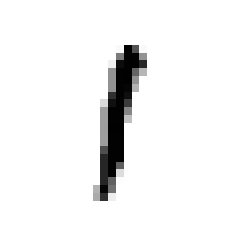

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [66]:
# show a feature along it's label

i = 12                                                                 # show feature number 12
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)   # display what it looks like
plt.axis("off")
plt.show()
Y_train[:,i]                                                           # display label number 12

### Loss function

In [74]:
def compute_multiclass_loss(Y, Y_hat):
    
    # MSE
    L_sum = np.sum((Y - Y_hat)**2)
    m = Y.shape[1]
    L = (1/m)*L_sum
    
    return L

### Try the efficient loss function as well

In [75]:
def compute_multiclass_loss_efficient(Y, Y_hat):

    # Log Loss
    L_sum = (np.sum(np.multiply(np.log(Y_hat),Y)) + np.sum(np.multiply(np.log(1-Y_hat),(1-Y))))
    m = Y.shape[1]
    L = -(1./m) * L_sum

    return L

### Train the model

In [70]:
def sigmoid(z):               # sigmoid activation function
    s = 1 / (1 + np.exp(-z))
    return s

In [77]:
n_x = X_train.shape[0]                               # number of inputs
n_h = 64                                             # 1 hidden layer, 64 neurons
learning_rate = 1

W1 = np.random.randn(n_h, n_x)                       # assigne weights and biases with random values
B1 = np.zeros((n_h, 1))                              # so h1 has 64 neurons
W2 = np.random.randn(digits, n_h) 
B2 = np.zeros((digits, 1))                           # and output layer will have 10 neurons

X = X_train                       
Y = Y_train

for i in range(2000):                                 # 2000 epochs

    Z1 = np.matmul(W1, X) + B1                        # output, wx + b
    A1 = sigmoid(Z1)                                  # activation output 
    Z2 = np.matmul(W2, A1) + B2
    A2 = sigmoid(Z2)

    cost = compute_multiclass_loss_efficient(Y, A2)   # calculate the loss

    dZ2 = A2-Y                                        # calculate all the partial derivatives
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    dB2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True) # keepdims formats the array

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    dB1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2                     # update the weigths and biases
    B2 = B2 - learning_rate * dB2
    W1 = W1 - learning_rate * dW1
    B1 = B1 - learning_rate * dB1

    if (i % 100 == 0):                                # for every 100 epoch, we output the loss
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

Epoch 0 cost:  24.572985937963715
Epoch 100 cost:  1.3489497382761166
Epoch 200 cost:  1.0604464571037209
Epoch 300 cost:  0.9247392491154036
Epoch 400 cost:  0.8391376733855804
Epoch 500 cost:  0.7776893123667894
Epoch 600 cost:  0.7299604559331057
Epoch 700 cost:  0.691186168555328
Epoch 800 cost:  0.6587810948501509
Epoch 900 cost:  0.6311639182821049
Epoch 1000 cost:  0.6072515247224884
Epoch 1100 cost:  0.5862527459338012
Epoch 1200 cost:  0.567563384991765
Epoch 1300 cost:  0.5507302351468718
Epoch 1400 cost:  0.5354156959839514
Epoch 1500 cost:  0.5213712413674982
Epoch 1600 cost:  0.5084192925828382
Epoch 1700 cost:  0.49642810257305664
Epoch 1800 cost:  0.48528972319354485
Epoch 1900 cost:  0.4749096614843133
Final cost: 0.46529652958685946


### Predictions

In [78]:
Z1 = np.matmul(W1, X_test) + B1                # calculate our network using our updated optimised weights and biases
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + B2
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

predictions = np.argmax(A2, axis=0)            # get our predictions
labels = np.argmax(Y_test, axis=0)             # get our labels

print(confusion_matrix(predictions, labels))   # use confusion matrix to look at model accuracy

[[ 957    0   12    6    2    9   16    2    5    8]
 [   0 1112    2    1    2    2    3   14    4    6]
 [   2    3  938   16    4    9    7   28    5    0]
 [   3    3   19  925    1   30    2    8   27    9]
 [   2    0   12    1  922    6   10    6   13   37]
 [   5    2    4   22    1  778    8    2   24   10]
 [   7    5   10    3    6   15  906    0    8    1]
 [   1    1   14    9    2    9    1  946    3   15]
 [   2    9   20   19    4   27    5    2  877   12]
 [   1    0    1    8   38    7    0   20    8  911]]


In [79]:
print(classification_report(predictions, labels)) # show different metrics for each class in the classifier

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1017
           1       0.98      0.97      0.98      1146
           2       0.91      0.93      0.92      1012
           3       0.92      0.90      0.91      1027
           4       0.94      0.91      0.93      1009
           5       0.87      0.91      0.89       856
           6       0.95      0.94      0.94       961
           7       0.92      0.95      0.93      1001
           8       0.90      0.90      0.90       977
           9       0.90      0.92      0.91       994

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000

